In [9]:
import os
from IPython.display import Image

import pandas as pd
import numpy as np

#others
import subprocess
from subprocess import check_output
import gc

import pprint

In [2]:
print(os.listdir('../DataHack-AmEx/train'))

['campaign_data.csv', 'coupon_item_mapping.csv', 'customer_demographics.csv', 'customer_transaction_data.csv', 'item_data.csv', 'train.csv']


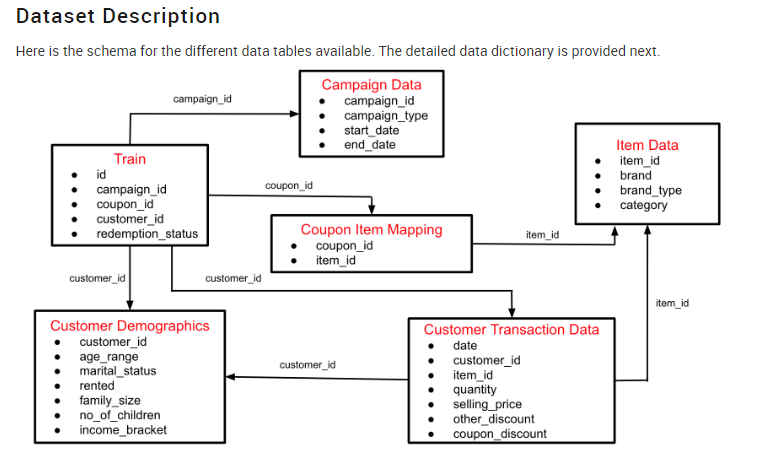

In [3]:
Image("img/Data model.png")

In [32]:

train_df = pd.read_csv('../DataHack-AmEx/train/customer_demographics.csv', delimiter=',' )  

In [33]:
train_df.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [34]:
print(train_df.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 176.8 KB
None


In [35]:
print(train_df.memory_usage(deep=True))

Index                80
customer_id        6080
age_range         46984
marital_status    37998
rented             6080
family_size       46949
no_of_children    30800
income_bracket     6080
dtype: int64


In [10]:
int_types = ["int8", "int16", "int32", "int64"]
for it in int_types:
     print(np.iinfo(it))

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



In [23]:
train_df.isnull().sum()

date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64

In [40]:
print(train_df['age_range'].value_counts())

46-55    271
36-45    187
26-35    130
70+       68
56-70     59
18-25     45
Name: age_range, dtype: int64


In [41]:
print(train_df['marital_status'].value_counts())

Married    317
Single     114
Name: marital_status, dtype: int64


In [42]:
print(train_df['rented'].value_counts())

0    719
1     41
Name: rented, dtype: int64


In [43]:
print(train_df['family_size'].value_counts())

2     303
1     248
3     104
5+     57
4      48
Name: family_size, dtype: int64


In [44]:
print(train_df['no_of_children'].value_counts())

1     107
3+     60
2      55
Name: no_of_children, dtype: int64


In [45]:
print(train_df['income_bracket'].value_counts())

5     187
4     165
6      88
3      70
2      68
1      59
8      37
7      32
9      29
12     10
10     10
11      5
Name: income_bracket, dtype: int64


In [47]:
#moma = pd.read_csv("moma.csv")
for col in train_df.columns:
   train_df[col] = train_df[col].astype('category')
print(train_df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null category
age_range         760 non-null category
marital_status    431 non-null category
rented            760 non-null category
family_size       760 non-null category
no_of_children    222 non-null category
income_bracket    760 non-null category
dtypes: category(7)
memory usage: 33.9 KB
None


1324566


In [8]:
types_dict1 = campaign_df_1.dtypes.to_dict()
types_dict2 = coupon_df_1.dtypes.to_dict()
types_dict3 = customer_dem_df_1.dtypes.to_dict()
types_dict4 = customer_tran_df_1.dtypes.to_dict()
types_dict5 = item_df_1.dtypes.to_dict()
types_dict6 = train_df_1.dtypes.to_dict()

In [9]:
pprint.pprint(types_dict1)
pprint.pprint(types_dict2)
pprint.pprint(types_dict3)
pprint.pprint(types_dict4)
pprint.pprint(types_dict5)
pprint.pprint(types_dict6)

{'campaign_id': dtype('int64'),
 'campaign_type': dtype('O'),
 'end_date': dtype('O'),
 'start_date': dtype('O')}
{'coupon_id': dtype('int64'), 'item_id': dtype('int64')}
{'age_range': dtype('O'),
 'customer_id': dtype('int64'),
 'family_size': dtype('int64'),
 'income_bracket': dtype('int64'),
 'marital_status': dtype('O'),
 'no_of_children': dtype('float64'),
 'rented': dtype('int64')}
{'coupon_discount': dtype('float64'),
 'customer_id': dtype('int64'),
 'date': dtype('O'),
 'item_id': dtype('int64'),
 'other_discount': dtype('float64'),
 'quantity': dtype('int64'),
 'selling_price': dtype('float64')}
{'brand': dtype('int64'),
 'brand_type': dtype('O'),
 'category': dtype('O'),
 'item_id': dtype('int64')}
{'campaign_id': dtype('int64'),
 'coupon_id': dtype('int64'),
 'customer_id': dtype('int64'),
 'id': dtype('int64'),
 'redemption_status': dtype('int64')}


In [10]:
types_dict1 = {'campaign_id': 'int32' }

types_dict2 = {'coupon_id': 'int32',
             'item_id': 'int32' }

types_dict3 = {'customer_id': 'int32',
             'family_size': 'O',
             'income_bracket': 'int32',
             'no_of_children': 'O',
             'rented': 'int32' }

types_dict4 = {'coupon_discount': 'float32',
             'customer_id': 'int32',
             'item_id': 'int32',
             'other_discount': 'float32',
             'quantity': 'int16',
             'selling_price': 'float32' }

types_dict5 = {'brand': 'int32',
             'item_id': 'int32'}

types_dict6 = {'campaign_id': 'int32',
             'coupon_id': 'int32',
             'customer_id': 'int32',
             'id': 'int32',
             'redemption_status': 'int8'}

In [11]:
campaign_df = pd.read_csv('../DataHack-AmEx/train/campaign_data.csv', delimiter=',' , low_memory=True, dtype = types_dict1 )
coupon_df = pd.read_csv('../DataHack-AmEx/train/coupon_item_mapping.csv', delimiter=',' , low_memory=True, dtype = types_dict2 )
customer_dem_df = pd.read_csv('../DataHack-AmEx/train/customer_demographics.csv', delimiter=',', low_memory=True, dtype = types_dict3 )
customer_tran_df = pd.read_csv('../DataHack-AmEx/train/customer_transaction_data.csv', delimiter=',' , low_memory=True, dtype = types_dict4 )                             
item_df = pd.read_csv('../DataHack-AmEx/train/item_data.csv', delimiter=',' , low_memory=True, dtype = types_dict5 ) 
train_df = pd.read_csv('../DataHack-AmEx/train/train.csv', delimiter=',' , low_memory=True, dtype = types_dict6 )                            


In [12]:
print("Shape of campaign_df      : ", campaign_df.shape)
print("Shape of coupon_df        : ", coupon_df.shape)
print("Shape of customer_dem_df  : ", customer_dem_df.shape)
print("Shape of customer_tran_df : ", customer_tran_df.shape)
print("Shape of item_df          : ", item_df.shape)
print("Shape of train_df         : ", train_df.shape)


Shape of campaign_df      :  (28, 4)
Shape of coupon_df        :  (92663, 2)
Shape of customer_dem_df  :  (760, 7)
Shape of customer_tran_df :  (1324566, 7)
Shape of item_df          :  (74066, 4)
Shape of train_df         :  (78369, 5)


In [13]:

# # Select duplicate rows except first occurrence based on all columns
# duplicateRowsDF = df6[df6.duplicated(['campaign_id'])]
 
# print("Duplicate Rows except first occurrence based on all columns are :")
# print(duplicateRowsDF , sep='\n')

In [14]:
print("campaign_df\n")
print(campaign_df.info())

print("\ncoupon_df\n")
print(coupon_df.info())

print("\ncustomer_dem_df\n")
print(customer_dem_df.info())

print("\ncustomer_tran_df\n")
print(customer_tran_df.info())

print("\nitem_df\n")
print(item_df.info())

print("\ntrain_df\n")
print(train_df.info())

campaign_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int32
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int32(1), object(3)
memory usage: 864.0+ bytes
None

coupon_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
coupon_id    92663 non-null int32
item_id      92663 non-null int32
dtypes: int32(2)
memory usage: 724.0 KB
None

customer_dem_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int32
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int32
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int32
dtypes: int32(3), object(4)
memory usage: 32.7+ KB
None

custome

## Merging/ Joining data

In [15]:
#merging train and campaign

train_camp_df = pd.merge(train_df 
                   , campaign_df
                   , left_on = 'campaign_id'
                   , right_on  = 'campaign_id'
                   , how = 'inner' 
                  )

train_camp_df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,7,13,644,1050,0,X,19/05/13,05/07/13
3,21,13,1028,89,0,X,19/05/13,05/07/13
4,23,13,517,1067,0,X,19/05/13,05/07/13


In [16]:
train_camp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 8 columns):
id                   78369 non-null int32
campaign_id          78369 non-null int32
coupon_id            78369 non-null int32
customer_id          78369 non-null int32
redemption_status    78369 non-null int8
campaign_type        78369 non-null object
start_date           78369 non-null object
end_date             78369 non-null object
dtypes: int32(4), int8(1), object(3)
memory usage: 3.7+ MB


In [17]:
del(campaign_df)

In [20]:
train_camp_df.drop(['start_date' , 'end_date'] , axis=1 , inplace= True)

In [21]:
train_camp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 6 columns):
id                   78369 non-null int32
campaign_id          78369 non-null int32
coupon_id            78369 non-null int32
customer_id          78369 non-null int32
redemption_status    78369 non-null int8
campaign_type        78369 non-null object
dtypes: int32(4), int8(1), object(1)
memory usage: 2.5+ MB


In [22]:
#merging customer_transaction and item_data

customer_df = pd.merge(customer_tran_df 
                   , item_df
                   , left_on = 'item_id'
                   , right_on  = 'item_id'
                   , how = 'inner' 
                  )

customer_df.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.259998,-10.69,0.0,56,Local,Natural Products
1,2012-01-02,135,26830,1,35.259998,-10.69,0.0,56,Local,Natural Products
2,2012-01-02,464,26830,1,35.259998,-10.69,0.0,56,Local,Natural Products
3,2012-01-12,1185,26830,1,45.950001,0.00,0.0,56,Local,Natural Products
4,2012-01-13,1140,26830,1,45.950001,0.00,0.0,56,Local,Natural Products


In [23]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324566 entries, 0 to 1324565
Data columns (total 10 columns):
date               1324566 non-null object
customer_id        1324566 non-null int32
item_id            1324566 non-null int32
quantity           1324566 non-null int16
selling_price      1324566 non-null float32
other_discount     1324566 non-null float32
coupon_discount    1324566 non-null float32
brand              1324566 non-null int32
brand_type         1324566 non-null object
category           1324566 non-null object
dtypes: float32(3), int16(1), int32(3), object(3)
memory usage: 73.3+ MB


In [24]:
customer_df.drop(['date'] , axis=1 , inplace = True)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324566 entries, 0 to 1324565
Data columns (total 9 columns):
customer_id        1324566 non-null int32
item_id            1324566 non-null int32
quantity           1324566 non-null int16
selling_price      1324566 non-null float32
other_discount     1324566 non-null float32
coupon_discount    1324566 non-null float32
brand              1324566 non-null int32
brand_type         1324566 non-null object
category           1324566 non-null object
dtypes: float32(3), int16(1), int32(3), object(2)
memory usage: 63.2+ MB


In [25]:
del(customer_tran_df)
del(item_df)

In [26]:
#merging train_camp_df(created above) and customer_demographics

train_cust1 = pd.merge(train_camp_df 
                   , customer_dem_df
                   , left_on = 'customer_id'
                   , right_on  = 'customer_id'
                   , how = 'inner' 
                  )

train_cust1.head()


,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,46-55,NaN,0,1,NaN,5
1,2444,13,513,1053,0,X,46-55,NaN,0,1,NaN,5
2,3651,13,166,1053,0,X,46-55,NaN,0,1,NaN,5
3,7712,13,766,1053,0,X,46-55,NaN,0,1,NaN,5
4,15317,13,165,1053,0,X,46-55,NaN,0,1,NaN,5


In [27]:
train_cust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43661 entries, 0 to 43660
Data columns (total 12 columns):
id                   43661 non-null int32
campaign_id          43661 non-null int32
coupon_id            43661 non-null int32
customer_id          43661 non-null int32
redemption_status    43661 non-null int8
campaign_type        43661 non-null object
age_range            43661 non-null object
marital_status       25394 non-null object
rented               43661 non-null int32
family_size          43661 non-null object
no_of_children       14056 non-null object
income_bracket       43661 non-null int32
dtypes: int32(6), int8(1), object(5)
memory usage: 3.0+ MB


In [28]:
del(customer_dem_df)

In [29]:
#merging train_camp_df(created above) and customer_demographics

train_cust2 = pd.merge(train_camp_df 
                   , customer_df
                   , left_on = 'customer_id'
                   , right_on  = 'customer_id'
                   , how = 'inner' 
                  )

train_cust2.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,13,27,1053,0,X,45502,3,267.149994,-234.020004,0.0,1088,Established,Grocery
1,1,13,27,1053,0,X,10046,1,35.619999,-6.770000,0.0,1954,Established,Grocery
2,1,13,27,1053,0,X,13174,1,24.580000,-10.690000,0.0,602,Established,Natural Products
3,1,13,27,1053,0,X,13174,1,35.259998,0.000000,0.0,602,Established,Natural Products
4,1,13,27,1053,0,X,58267,1,213.360001,-106.860001,0.0,686,Established,Grocery


In [30]:
del(train_camp_df)
del(customer_df)

In [31]:
train_cust2.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,13,27,1053,0,X,45502,3,267.149994,-234.020004,0.0,1088,Established,Grocery
1,1,13,27,1053,0,X,10046,1,35.619999,-6.770000,0.0,1954,Established,Grocery
2,1,13,27,1053,0,X,13174,1,24.580000,-10.690000,0.0,602,Established,Natural Products
3,1,13,27,1053,0,X,13174,1,35.259998,0.000000,0.0,602,Established,Natural Products
4,1,13,27,1053,0,X,58267,1,213.360001,-106.860001,0.0,686,Established,Grocery


In [32]:
train_cust2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80918716 entries, 0 to 80918715
Data columns (total 14 columns):
id                   int32
campaign_id          int32
coupon_id            int32
customer_id          int32
redemption_status    int8
campaign_type        object
item_id              int32
quantity             int16
selling_price        float32
other_discount       float32
coupon_discount      float32
brand                int32
brand_type           object
category             object
dtypes: float32(3), int16(1), int32(6), int8(1), object(3)
memory usage: 5.4+ GB


In [34]:
train_cust2.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
campaign_type        0
item_id              0
quantity             0
selling_price        0
other_discount       0
coupon_discount      0
brand                0
brand_type           0
category             0
dtype: int64

In [35]:
train_cust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43661 entries, 0 to 43660
Data columns (total 12 columns):
id                   43661 non-null int32
campaign_id          43661 non-null int32
coupon_id            43661 non-null int32
customer_id          43661 non-null int32
redemption_status    43661 non-null int8
campaign_type        43661 non-null object
age_range            43661 non-null object
marital_status       25394 non-null object
rented               43661 non-null int32
family_size          43661 non-null object
no_of_children       14056 non-null object
income_bracket       43661 non-null int32
dtypes: int32(6), int8(1), object(5)
memory usage: 3.0+ MB


In [36]:
train_final = pd.merge(train_cust1 
                   , train_cust2
                   , on=['id', 'campaign_id' , 'customer_id' , 'redemption_status' ,'campaign_type' ]
                   , how = 'inner' 
                  )

train_final.head()

,id,campaign_id,coupon_id_x,customer_id,redemption_status,campaign_type,age_range,marital_status,rented,family_size,...,income_bracket,coupon_id_y,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,13,27,1053,0,X,46-55,NaN,0,1,...,5,27,45502,3,267.149994,-234.020004,0.0,1088,Established,Grocery
1,1,13,27,1053,0,X,46-55,NaN,0,1,...,5,27,10046,1,35.619999,-6.770000,0.0,1954,Established,Grocery
2,1,13,27,1053,0,X,46-55,NaN,0,1,...,5,27,13174,1,24.580000,-10.690000,0.0,602,Established,Natural Products
3,1,13,27,1053,0,X,46-55,NaN,0,1,...,5,27,13174,1,35.259998,0.000000,0.0,602,Established,Natural Products
4,1,13,27,1053,0,X,46-55,NaN,0,1,...,5,27,58267,1,213.360001,-106.860001,0.0,686,Established,Grocery


In [38]:
del(train_cust1)
del(train_cust2)

In [41]:
train_final.shape

(52266414, 21)